<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snszz

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [3]:
## Write your code here

print(df.dtypes)
for col in df.columns:
    print([col])
print(df.describe())

ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object
['ResponseId']
['MainBranch']
['Age']
['Employment']
['RemoteWork']
['Check']
['CodingActivities']
['EdLevel']
['LearnCode']
['LearnCodeOnline']
['TechDoc']
['YearsCode']
['YearsCodePro']
['DevType']
['OrgSize']
['PurchaseInfluence']
['BuyNewTool']
['BuildvsBuy']
['TechEndorse']
['Country']
['Currency']
['CompTotal']
['LanguageHaveWorkedWith']
['LanguageWantToWorkWith']
['LanguageAdmired']
['DatabaseHaveWorkedWith']
['DatabaseWantToWorkWith']
['DatabaseAdmired']
['PlatformHaveWorkedWith']
['PlatformWantToWorkWith']
['PlatformAdmired']
['WebframeHaveWorkedWith']
['WebframeWantToWorkWith']
['WebframeAdmired']
['EmbeddedHaveWor

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [4]:
# Replace missing values with the most common (mode) value for each column
for col in df.columns:
    if df[col].isnull().any():
        mode_val = df[col].mode(dropna=True)
        if not mode_val.empty:
            df[col].fillna(mode_val[0], inplace=True)


/tmp/ipykernel_2967/1270913166.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val[0], inplace=True)


In [5]:
## Write your code here
df.isnull().sum()


ResponseId             0
MainBranch             0
Age                    0
Employment             0
RemoteWork             0
                      ..
JobSatPoints_11        0
SurveyLength           0
SurveyEase             0
ConvertedCompYearly    0
JobSat                 0
Length: 114, dtype: int64

### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [6]:
## Write your code here


print(df['YearsCodePro'].value_counts())
print(df['JobSat'].value_counts())
print(df['Employment'].value_counts())


YearsCodePro
2                     17995
3                      4093
5                      3526
10                     3251
4                      3215
Less than 1 year       2856
6                      2843
1                      2639
8                      2549
7                      2517
12                     1777
15                     1635
20                     1549
9                      1493
11                     1312
13                     1127
14                     1082
25                      998
16                      946
18                      867
17                      814
30                      689
24                      632
19                      516
22                      492
23                      448
26                      426
27                      380
21                      380
28                      342
35                      285
29                      196
40                      194
32                      194
34                      169
38     

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


Text(0, 0.5, 'percentage')

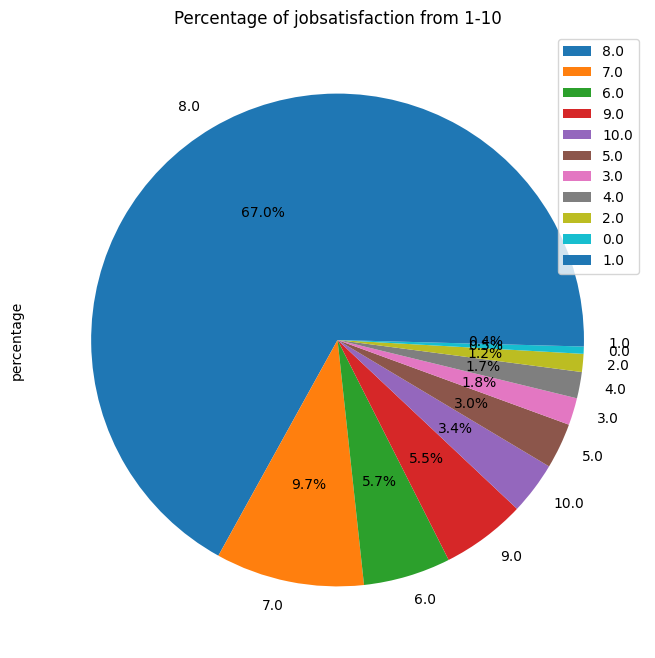

In [7]:
## Write your code here

job_sat = df['JobSat'].value_counts()
plt.figure(figsize=(8, 8))
job_sat.plot.pie(
    autopct='%1.1f%%',
    legend=True
)

plt.title('Percentage of jobsatisfaction from 1-10') 
plt.ylabel('percentage') 

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


<Figure size 1600x1000 with 0 Axes>

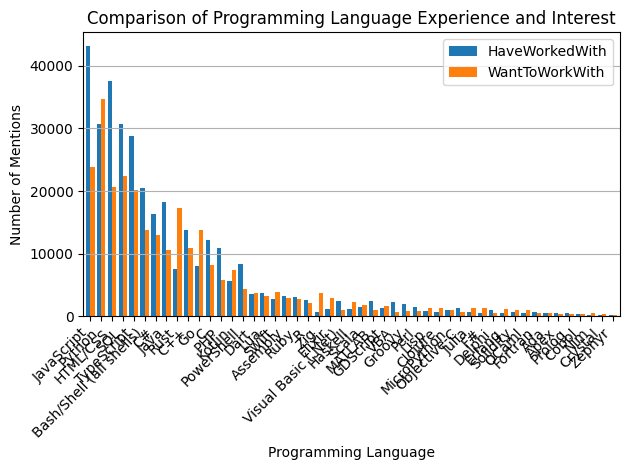

In [10]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the relevant columns exist
if 'LanguageHaveWorkedWith' in df.columns and 'LanguageWantToWorkWith' in df.columns:

    # Split and flatten the semicolon-separated lists
    have_worked = df['LanguageHaveWorkedWith'].dropna().str.split(';').explode()
    want_to_work = df['LanguageWantToWorkWith'].dropna().str.split(';').explode()

    # Count frequencies
    have_counts = have_worked.value_counts()
    want_counts = want_to_work.value_counts()

    # Combine into a single DataFrame
    combined = pd.DataFrame({
        'HaveWorkedWith': have_counts,
        'WantToWorkWith': want_counts
    }).fillna(0)

    # Sort by total popularity
    combined['Total'] = combined['HaveWorkedWith'] + combined['WantToWorkWith']
    combined = combined.sort_values('Total', ascending=False)

    # Plot grouped bar chart
    plt.figure(figsize=(16, 10))
    combined[['HaveWorkedWith', 'WantToWorkWith']].plot(kind='bar', width=0.8)
    plt.title('Comparison of Programming Language Experience and Interest')
    plt.xlabel('Programming Language')
    plt.ylabel('Number of Mentions')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.grid(axis='y')
    plt.show()

else:
    print("Columns 'LanguageHaveWorkedWith' or 'LanguageWantToWorkWith' not found in DataFrame.")


### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


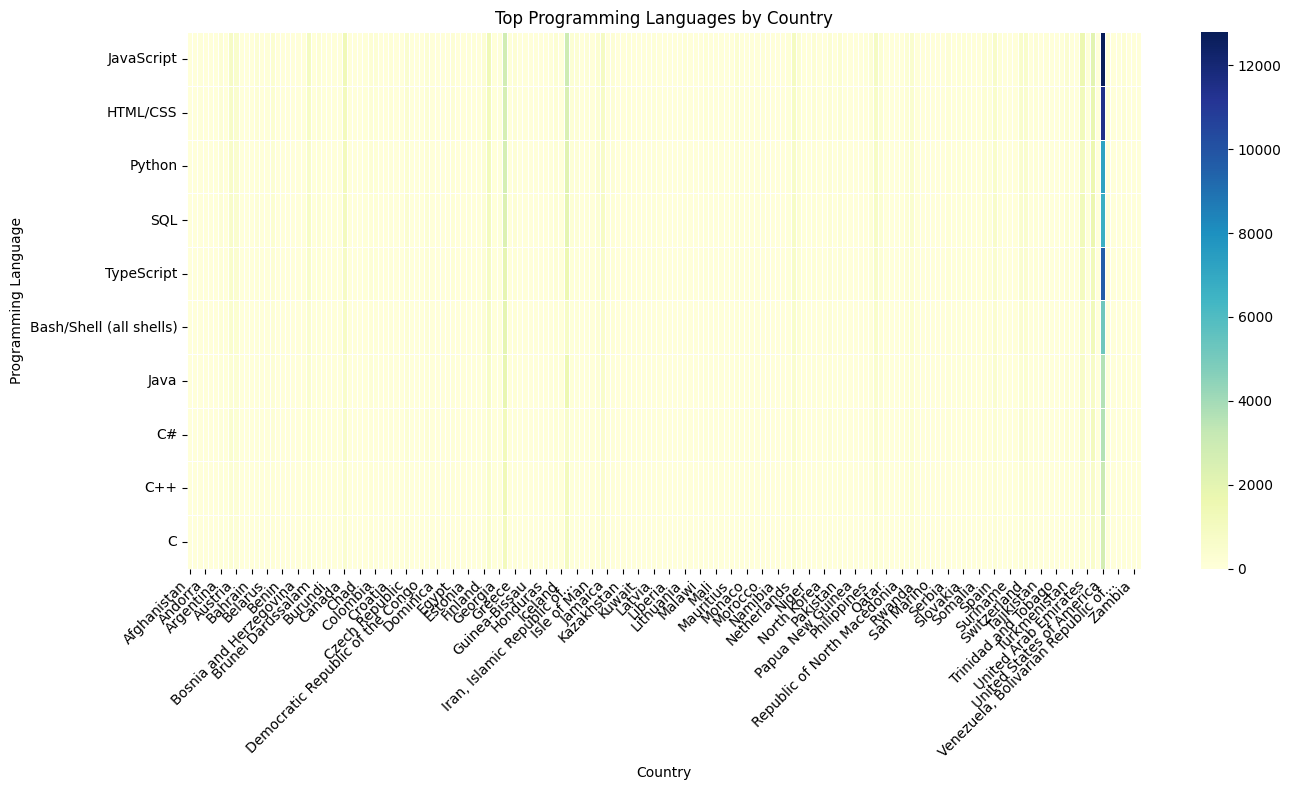

/tmp/ipykernel_2967/3896244395.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=india_counts.values, y=india_counts.index, palette='Blues_d')


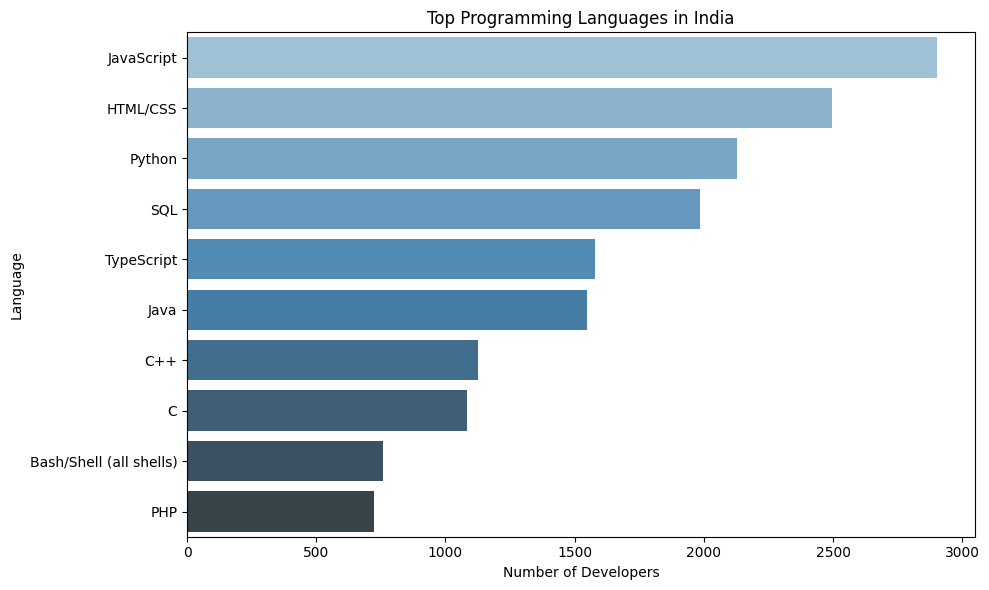

In [13]:

import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Select required columns and drop missing values
lang_region = df[['Country', 'LanguageHaveWorkedWith']].dropna()

# Step 3: Expand multiple languages into separate rows
lang_region_expanded = lang_region.assign(
    Language=lang_region['LanguageHaveWorkedWith'].str.split(';')
).explode('Language')

# Step 4: Count occurrences by Country and Language
lang_counts = lang_region_expanded.groupby(['Country', 'Language']).size().reset_index(name='Count')

# Step 5: Pivot for heatmap (Language vs Country)
lang_pivot = lang_counts.pivot(index='Language', columns='Country', values='Count').fillna(0)

# Step 6: Filter top 10 languages overall
top_languages = lang_counts.groupby('Language')['Count'].sum().nlargest(10).index
lang_pivot_top = lang_pivot.loc[top_languages]

# Step 7: Plot heatmap for top languages by country
plt.figure(figsize=(14, 8))
sns.heatmap(lang_pivot_top, cmap='YlGnBu', linewidths=0.5, fmt='.0f')
plt.title('Top Programming Languages by Country')
plt.ylabel('Programming Language')
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Step 8 (Optional): Bar plot for one country (e.g., India)
india_langs = lang_region_expanded[lang_region_expanded['Country'] == 'India']
india_counts = india_langs['Language'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=india_counts.values, y=india_counts.index, palette='Blues_d')
plt.title('Top Programming Languages in India')
plt.xlabel('Number of Developers')
plt.ylabel('Language')
plt.tight_layout()
plt.show()


### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


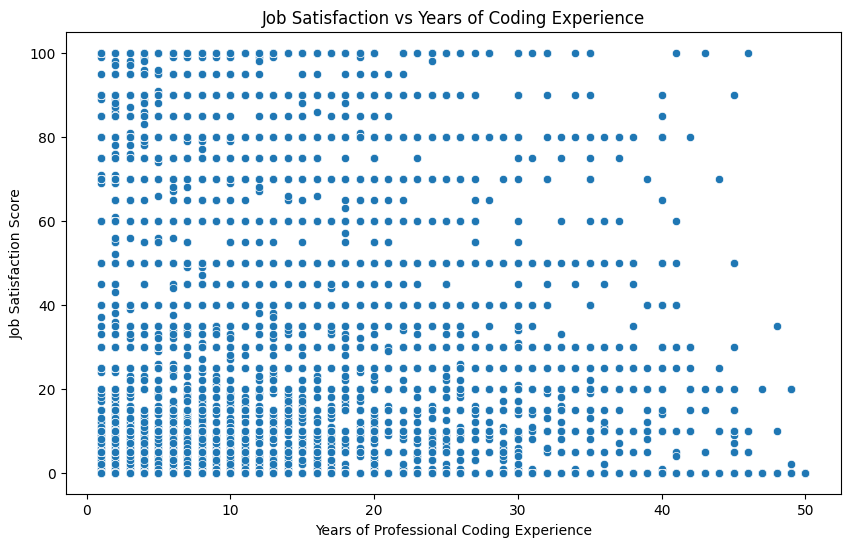

In [12]:
## Write your code here
import seaborn as sns
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Step 2: Drop rows with missing values in either column
df_scatter = df[['YearsCodePro', 'JobSatPoints_1']].dropna()

# Step 3: Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_scatter, x='YearsCodePro', y='JobSatPoints_1')

plt.title('Job Satisfaction vs Years of Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score')
plt.show()

### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


/tmp/ipykernel_2967/726979133.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


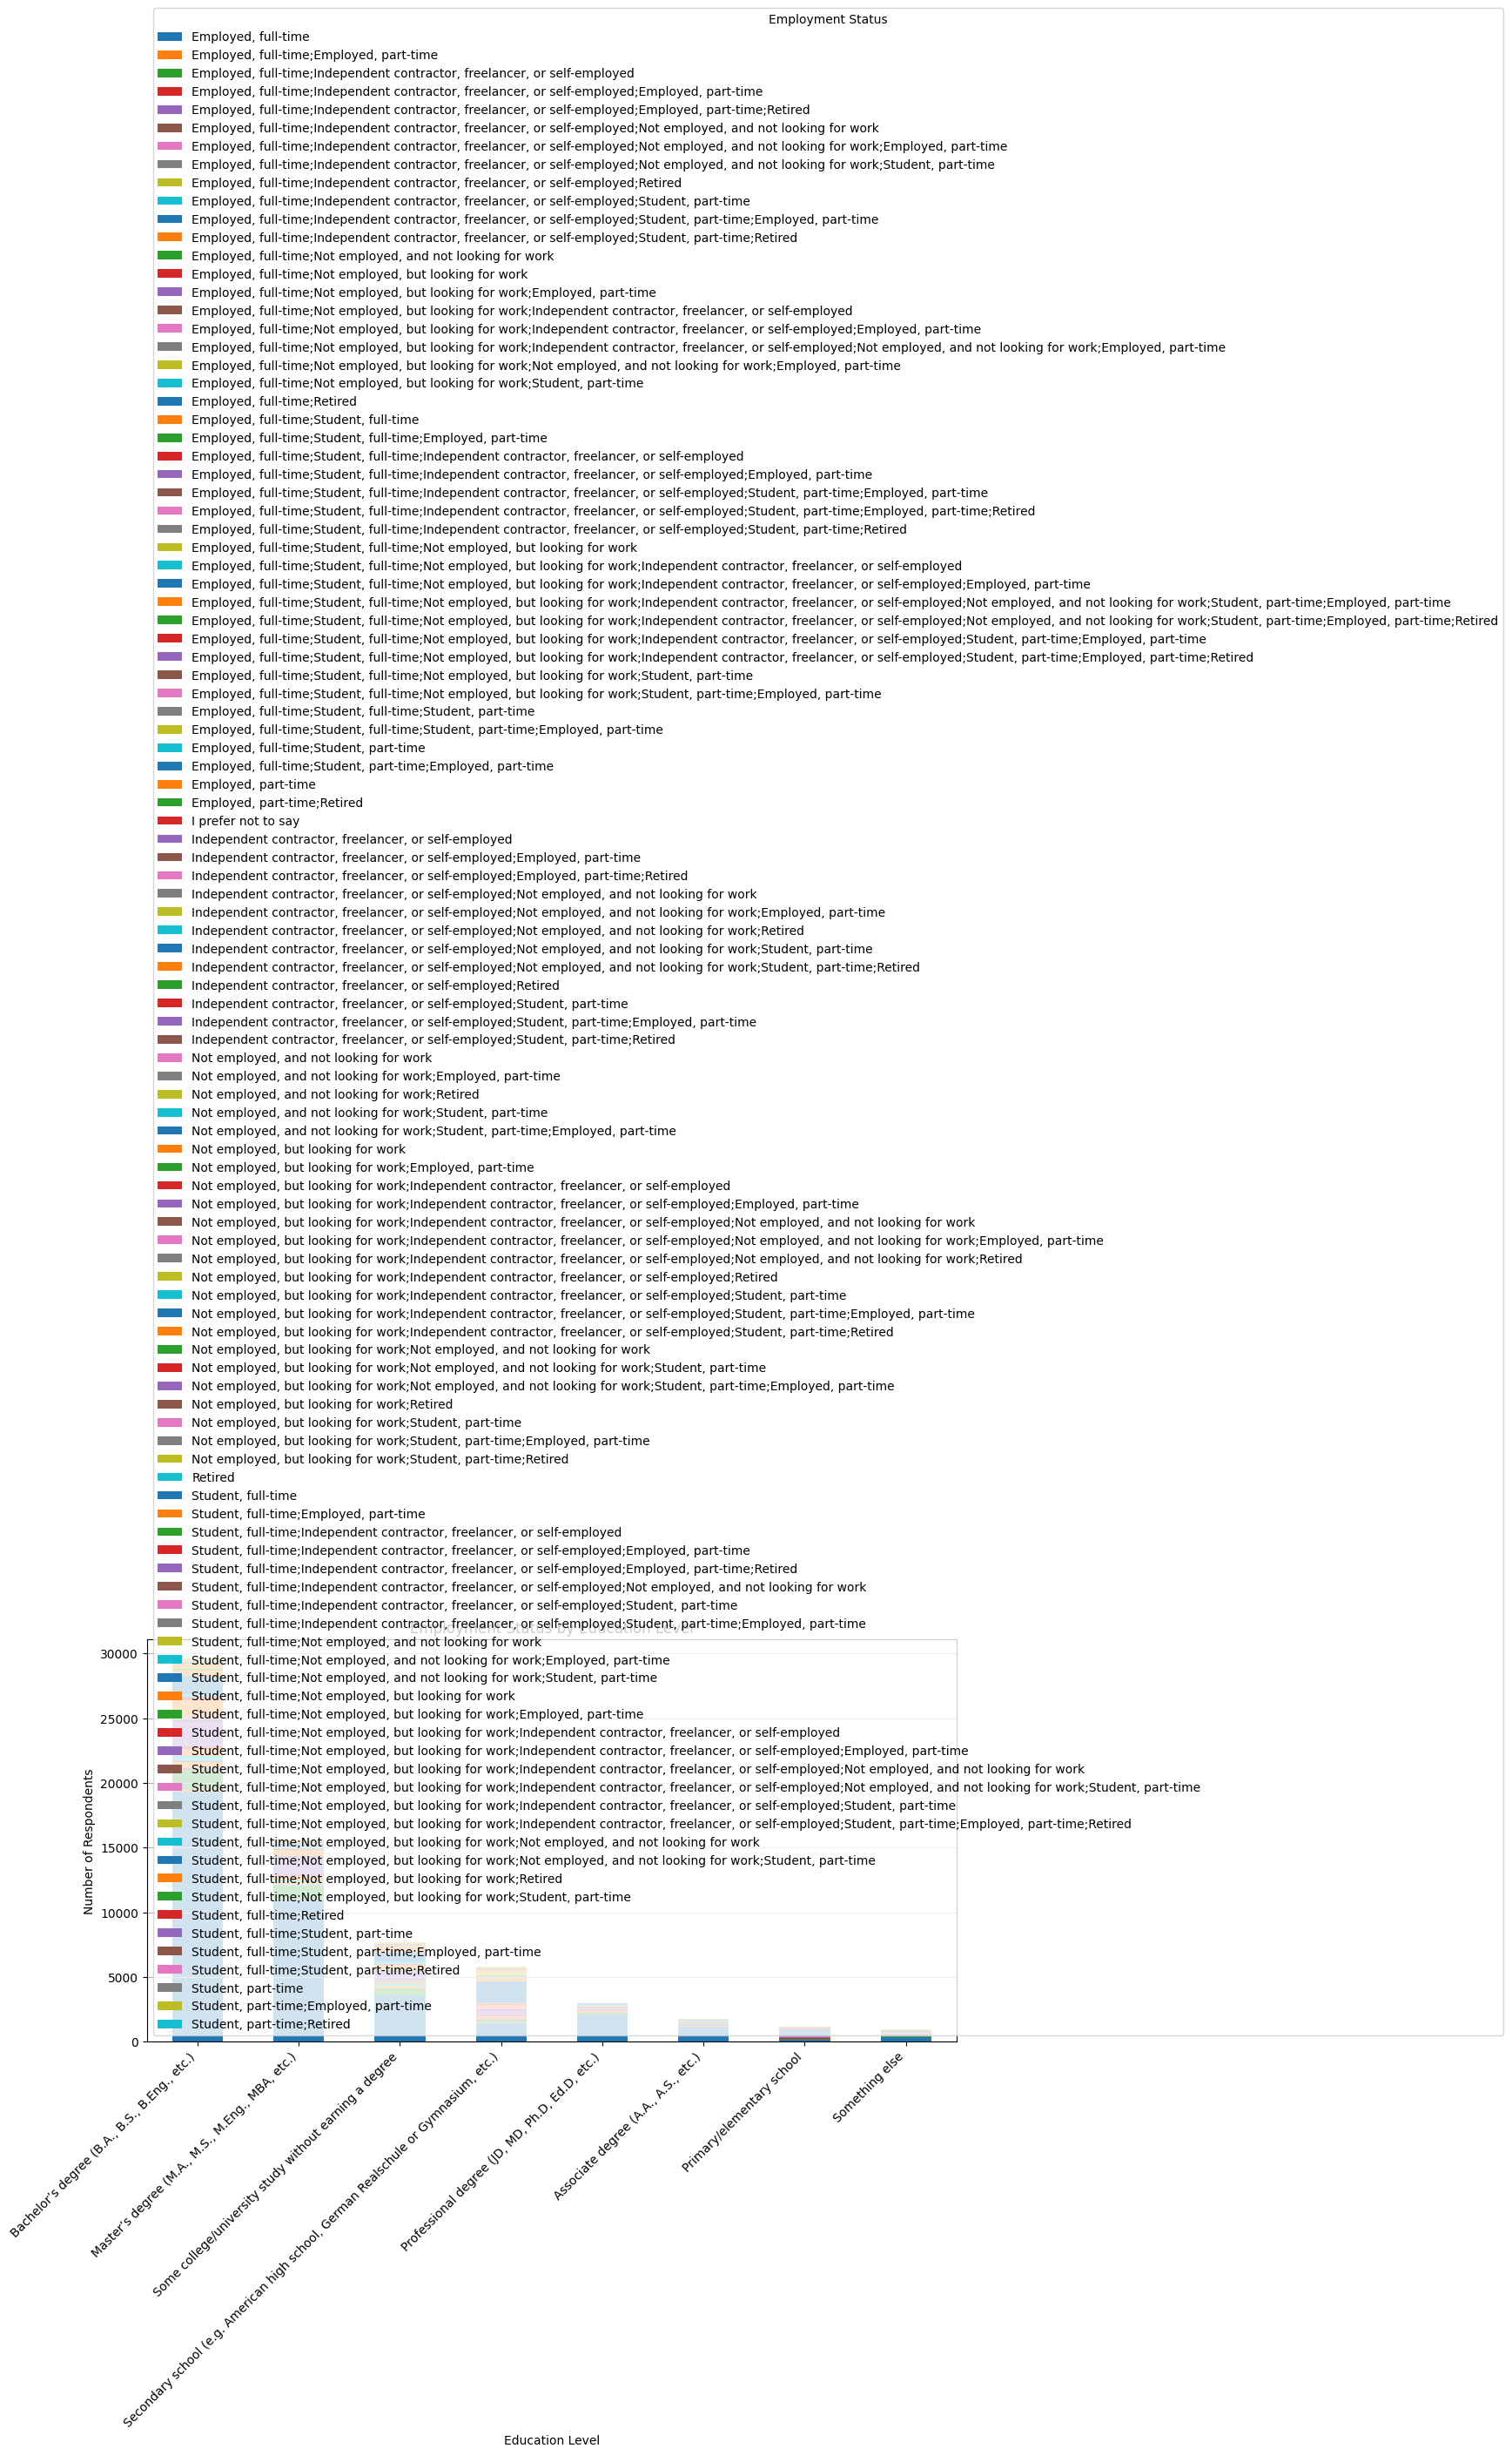

In [14]:
## Write your code here


# Drop rows with missing values in either column
df_clean = df[['Employment', 'EdLevel']].dropna()

# Create the cross-tabulation table
crosstab = pd.crosstab(df_clean['EdLevel'], df_clean['Employment'])

# Optional: sort rows by total count
crosstab = crosstab.loc[crosstab.sum(axis=1).sort_values(ascending=False).index]

# Plot stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Employment Status by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Employment Status')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [15]:
## Write your code here

df.to_csv('lab_13.csv', index=False)

print("Modified dataset saved as 'modified_developer_survey.csv'")

Modified dataset saved as 'modified_developer_survey.csv'


### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
